<Figure size 1000x600 with 0 Axes>

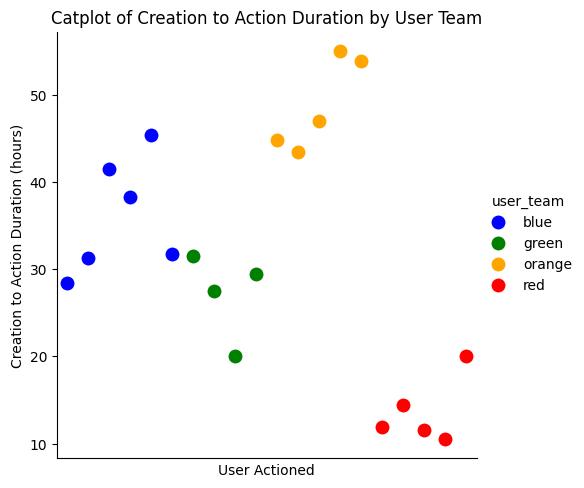

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('tickets.csv')
df = df[df['customer_problem_resolved']] # The data only shows where the issue was RESOLVED!!!!!

df['action_date'] = pd.to_datetime(df['action_date'])
df['creation_date'] = pd.to_datetime(df['creation_date'])
df['view_date'] = pd.to_datetime(df['view_date'])

df['creation_to_action_duration'] = df['action_date'] - df['creation_date']
df['creation_to_action_duration_hours'] = (df['action_date'] - df['creation_date']).dt.total_seconds() / 3600 # Represents the time between creating the ticket and closing the ticket - so time taken to resolve a ticket
average_durations_per_user = df.groupby(['user_team', 'user_actioned']).agg({
    'creation_to_action_duration_hours': 'mean'}).reset_index()

data=average_durations_per_user[['user_team','user_actioned', 'creation_to_action_duration_hours']]
colors = {'blue': 'blue', 'green': 'green', 'orange': 'orange', 'red': 'red'}
plt.figure(figsize=(10, 6))
sns.catplot(data=data, x='user_actioned', y='creation_to_action_duration_hours', 
            hue='user_team', palette=colors, kind='swarm', s=100)

plt.xlabel('User Actioned')
plt.ylabel('Creation to Action Duration (hours)')
plt.title('Catplot of Creation to Action Duration by User Team')
plt.xticks([])

# Show the plot
plt.show()


### User Story

- The average time taken to resolve a ticket is lowest in all red team members, followed by green blue. 
The average time taken for red team user is less than half compared to other teams

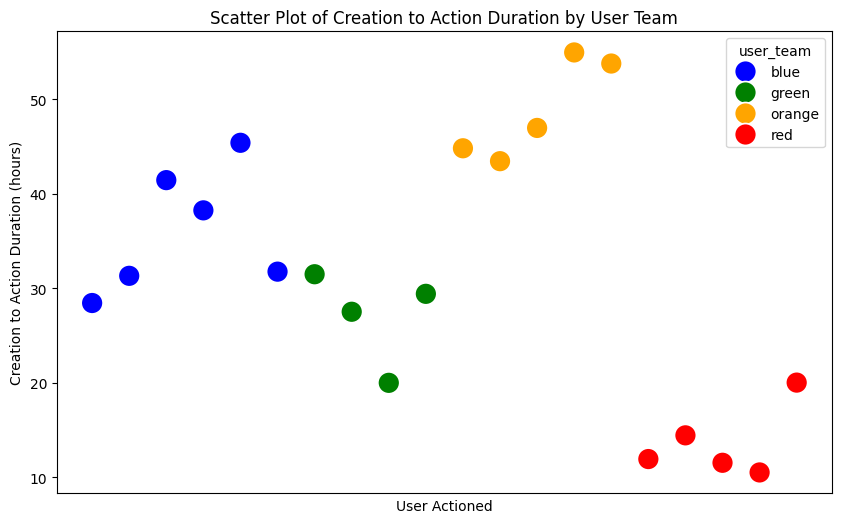

In [8]:


# Define colors for each user team
colors = {'blue': 'blue', 'green': 'green', 'orange': 'orange', 'red': 'red'}

# Create a scatter plot with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='user_actioned', y='creation_to_action_duration_hours', hue='user_team', palette=colors, s=250)

# Set labels and title
plt.xlabel('User Actioned')
plt.ylabel('Creation to Action Duration (hours)')
plt.title('Scatter Plot of Creation to Action Duration by User Team')
plt.xticks([])
# Show the plot
plt.show()


In [75]:
average_durations_per_user_team

,user_team,creation_to_view_duration_hours,creation_to_action_duration_hours,action_to_view_duration_hours
0,blue,36.050510,36.600443,36.600443
1,green,26.054781,26.559072,26.559072
2,orange,50.203605,50.802142,50.802142
3,red,13.653114,14.005210,14.005210


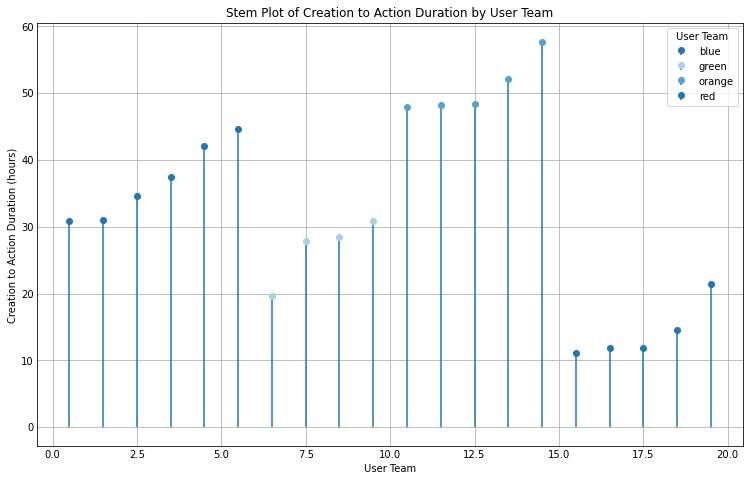

In [64]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

x = 0.5 + np.arange(len(average_durations_per_user['user_team']))
y = average_durations_per_user['creation_to_action_duration_hours']
teams = average_durations_per_user['user_team']

# plot
fig, ax = plt.subplots(figsize=(10, 6))

for i, team in enumerate(np.unique(teams)):
    team_indices = np.where(teams == team)[0]
    ax.stem(x[team_indices], y.iloc[team_indices], linefmt='-', markerfmt='o', basefmt=' ', label=team)

# Adding labels and title
ax.set(xlabel='User Team', ylabel='Creation to Action Duration (hours)', title='Stem Plot of Creation to Action Duration by User Team')
ax.legend(title='User Team')

plt.show()


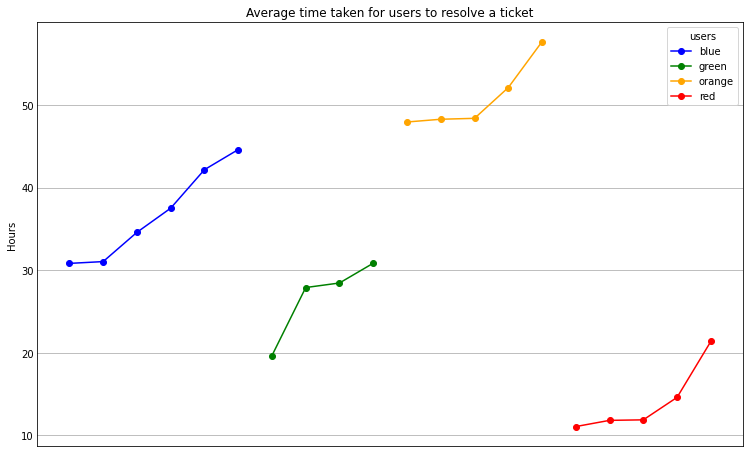

In [63]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

colors = {'blue': 'blue', 'green': 'green', 'orange': 'orange', 'red': 'red'}

x = 0.5 + np.arange(len(average_durations_per_user['user_team']))
y = average_durations_per_user['creation_to_action_duration_hours']
teams = average_durations_per_user['user_team']

fig, ax = plt.subplots(figsize=(10, 6))

for i, team in enumerate(np.unique(teams)):
    team_indices = np.where(teams == team)[0]
    ax.plot(x[team_indices], y.iloc[team_indices], 'o-', color=colors[team], label=team)

ax.set(ylabel='Hours', title='Average time taken for users to resolve a ticket')
ax.legend(title='users')
plt.xticks([])

plt.show()



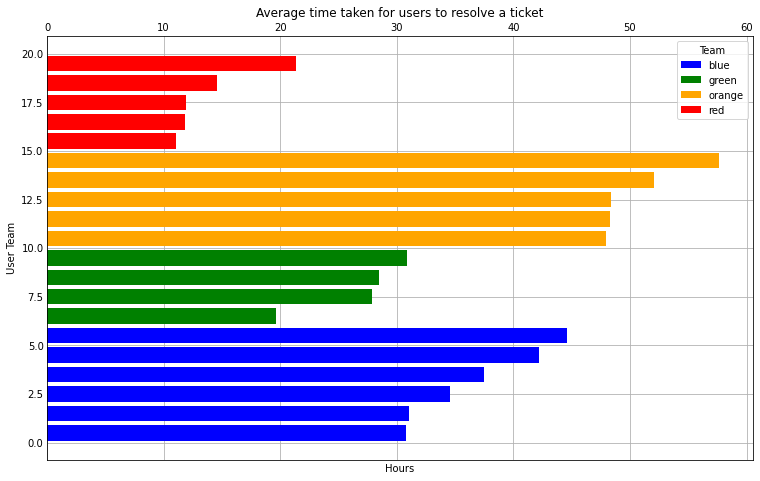

In [69]:

plt.style.use('_mpl-gallery')

colors = {'blue': 'blue', 'green': 'green', 'orange': 'orange', 'red': 'red'}

x = 0.5 + np.arange(len(average_durations_per_user['user_team']))
y = average_durations_per_user['creation_to_action_duration_hours']
teams = average_durations_per_user['user_team']

fig, ax = plt.subplots(figsize=(10, 6))

for i, team in enumerate(np.unique(teams)):
    team_indices = np.where(teams == team)[0]
    ax.barh(x[team_indices], y.iloc[team_indices], color=colors[team], label=team)

ax.set(ylabel='User Team', xlabel='Hours', title='Average time taken for users to resolve a ticket')
ax.legend(title='Team')
ax.xaxis.tick_top()

plt.show()


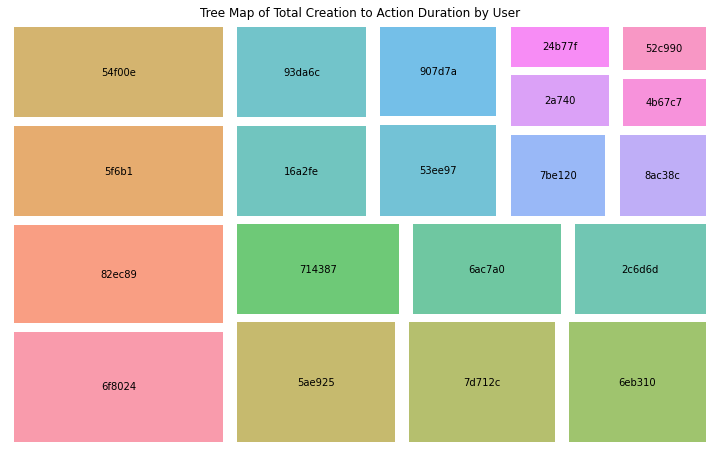

In [72]:
import matplotlib.pyplot as plt
import squarify

# Set the color palette for users
user_palette = sns.color_palette("husl", n_colors=len(data['user_actioned'].unique()))

# Calculate total duration for each user
total_duration_per_user = data.groupby('user_actioned')['creation_to_action_duration_hours'].sum().sort_values(ascending=False)

# Plotting the treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=total_duration_per_user.values, label=total_duration_per_user.index,
              color=user_palette, alpha=0.7, pad=True)

# Adding labels and title
plt.title('Tree Map of Total Creation to Action Duration by User')
plt.axis('off')  # Turn off axis labels

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('tickets.csv')

df['action_date'] = pd.to_datetime(df['action_date'])
df['creation_date'] = pd.to_datetime(df['creation_date'])
df['view_date'] = pd.to_datetime(df['view_date'])




# Calculate time differences
df['creation_to_view_duration'] = df['view_date'] - df['creation_date']
df['creation_to_action_duration'] = df['action_date'] - df['creation_date']


# df['creation_to_view_duration_hours'] = (df['view_date'] - df['creation_date']).dt.total_seconds() / 3600
df['creation_to_action_duration_hours'] = (df['action_date'] - df['creation_date']).dt.total_seconds() / 3600 # Represents the time between creating the ticket and closing the ticket - so time taken to resolve a ticket
# df['action_to_view_duration_hours'] = (df['action_date'] - df['creation_date']).dt.total_seconds() / 3600


In [29]:
average_durations_per_user_team = df.groupby(['user_team']).agg({
#     'creation_to_view_duration_hours': 'mean',
    'creation_to_action_duration_hours': 'mean',
#     'action_to_view_duration_hours':'mean'
}).reset_index()

In [26]:
df = df[df['customer_problem_resolved']]
df

,ticket_type,creation_date,view_date,action_date,customer_satisfaction,customer_problem_resolved,user_actioned,user_team,creation_to_view_duration,creation_to_action_duration,creation_to_action_duration_hours
1,email,2023-06-02 08:14:00.000000000,2023-06-02 08:56:00.000000000,2023-06-02 09:25:00.000000000,3,True,8ac38c,green,0 days 00:42:00,0 days 01:11:00,1.183333
2,email,2023-06-02 06:03:00.000000000,2023-06-02 09:29:00.000000000,2023-06-02 09:56:00.000000000,5,True,8ac38c,green,0 days 03:26:00,0 days 03:53:00,3.883333
4,email,2023-06-02 09:24:00.000000000,2023-06-02 10:24:00.000000000,2023-06-02 10:46:00.000000000,5,True,8ac38c,green,0 days 01:00:00,0 days 01:22:00,1.366667
6,email,2023-06-02 10:51:00.000000000,2023-06-02 11:26:00.000000000,2023-06-02 11:52:00.000000000,5,True,8ac38c,green,0 days 00:35:00,0 days 01:01:00,1.016667
8,email,2023-06-02 11:24:00.000000000,2023-06-02 13:04:47.130122249,2023-06-02 13:35:47.130122249,5,True,8ac38c,green,0 days 01:40:47.130122249,0 days 02:11:47.130122249,2.196425
...,...,...,...,...,...,...,...,...,...,...,...
25537,web_form,2023-08-27 11:11:00.000000000,2023-08-28 15:35:11.937352888,2023-08-28 16:13:11.937352888,3,True,54f00e,orange,1 days 04:24:11.937352888,1 days 05:02:11.937352888,29.036649
25538,live_chat,2023-08-28 16:19:11.937352888,2023-08-28 16:19:11.937352888,2023-08-28 16:41:11.937352888,1,True,54f00e,orange,0 days 00:00:00,0 days 00:22:00,0.366667
25550,email,2023-08-27 08:31:00.000000000,2023-08-29 16:07:18.152970180,2023-08-29 16:46:18.152970180,1,True,54f00e,orange,2 days 07:36:18.152970180,2 days 08:15:18.152970180,56.255042
25560,email,2023-08-28 15:44:00.000000000,2023-08-30 15:36:00.850523820,2023-08-30 16:11:00.850523820,3,True,54f00e,orange,1 days 23:52:00.850523820,2 days 00:27:00.850523820,48.450236


In [35]:
average_durations_per_user_team

,user_team,creation_to_action_duration_hours
0,blue,37.630725
1,green,26.458954
2,orange,48.556689
3,red,13.476848
